In [2]:
import tensorflow
from tensorflow.keras.datasets import cifar10

In [3]:
(X_train,y_train),(X_test,y_test) = cifar10.load_data()

In [6]:
X_train[:10]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

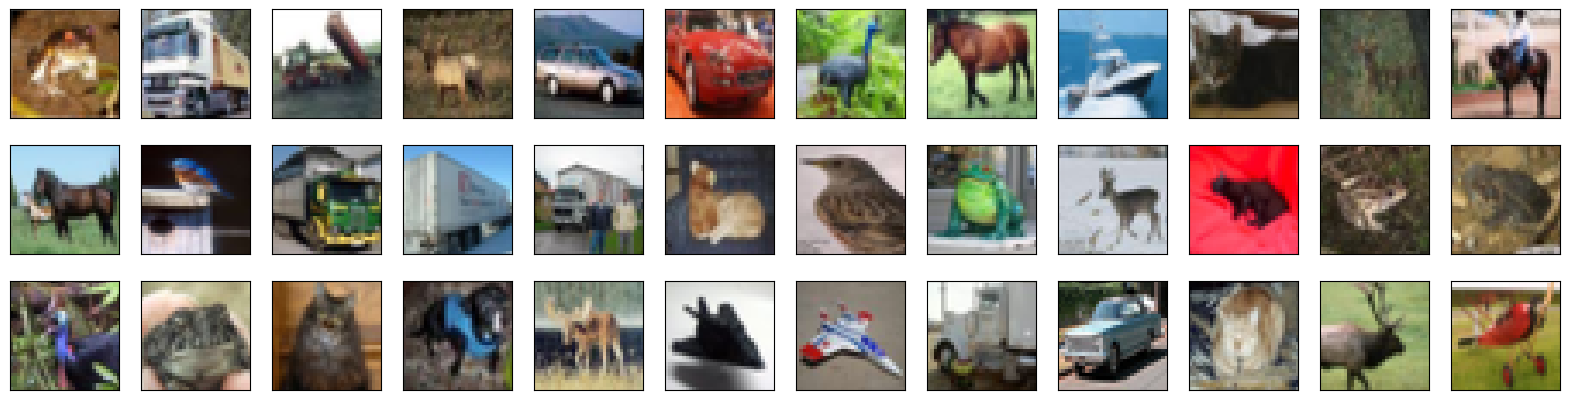

In [8]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

In [49]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [50]:
## Scaling of the pixels
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [51]:
print('x_train shape :',X_train.shape)
print('x_test shape :',X_test.shape)

x_train shape : (50000, 32, 32, 3)
x_test shape : (10000, 32, 32, 3)


In [52]:
print(y_train.shape)
print(y_test.shape)

(50000, 1)
(10000, 1)


In [53]:
print(y_train[:10])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


In [54]:
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)
X_train,X_valid = X_train[5000:],X_train[:5000]
y_train,y_valid  = y_train[5000:],y_train[:5000]

In [55]:
y_train[:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [56]:
print(X_train.shape)
print(X_test.shape)
print(X_valid.shape)

(45000, 32, 32, 3)
(10000, 32, 32, 3)
(5000, 32, 32, 3)


In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,Dropout

In [58]:
model = Sequential()
model.add(Conv2D(filters =16, kernel_size= (3,3), padding = 'same',activation='relu',input_shape = (32,32,3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Conv2D(filters = 32, kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(500,activation ='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))

/opt/anaconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [59]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 500)            │       512,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 541,094 (2.06 MB)

 Trainable params: 541,094 (2.06 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [61]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='model.weights.best2.hdf5.keras',verbose =1, save_best_only=True)

In [62]:
hist = model.fit(X_train,y_train,batch_size = 32, epochs=1,validation_data=(X_valid,y_valid),callbacks=[checkpoint],
                 verbose = 2, shuffle =True)

2024-07-01 17:26:56.042202: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.



Epoch 1: val_loss improved from inf to 1.30787, saving model to model.weights.best2.hdf5.keras
1407/1407 - 26s - 19ms/step - accuracy: 0.4271 - loss: 1.5804 - val_accuracy: 0.5344 - val_loss: 1.3079


In [63]:
model.load_weights('model.weights.best2.hdf5.keras')

In [71]:
y_hat =model.predict(X_test)
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [72]:
X_test.shape

(10000, 32, 32, 3)

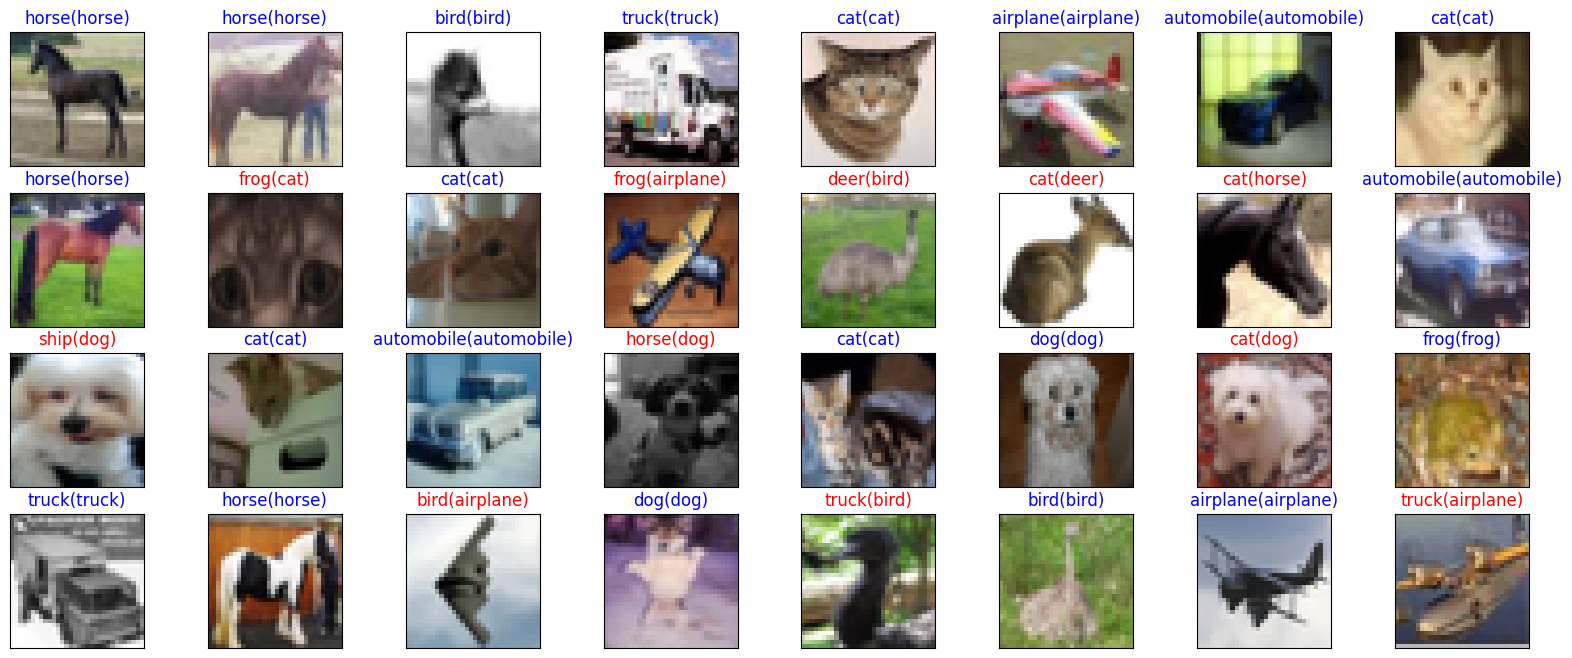

In [75]:
fig = plt.figure(figsize = (20,8))
for i,idx in enumerate(np.random.choice(X_test.shape[0],size = 32, replace=False)):
    ax = fig.add_subplot(4,8,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{}({})".format(labels[pred_idx],labels[true_idx]),
                 color = 'blue' if pred_idx == true_idx else 'red')
    